# Test 4 : Critical k

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import sys
import seaborn as sns

## Time wise


In [134]:


# Try to get the script directory; if in a notebook, use the current working directory
try:
    SCRIPT_DIR = Path(__file__).resolve().parent
except NameError:
    # We are in a notebook/interactive session
    SCRIPT_DIR = Path(os.getcwd()).resolve()

# Adjust this based on where your 'logs' folder is relative to the notebook
# If 'logs' is in the same folder as your notebook, use SCRIPT_DIR
# If 'logs' is one level up, use SCRIPT_DIR.parent
PROJECT_ROOT = SCRIPT_DIR.parent

LOG_FILE = PROJECT_ROOT / "logs" / "time_crit_k.csv"
PLOT_DIR = PROJECT_ROOT / "logs" / "plots"

print(f"Looking for log file at: {LOG_FILE}")

Looking for log file at: /Users/nautilus/gridfw/logs/time_crit_k.csv


In [135]:

def load_data():
    if not os.path.exists(LOG_FILE):
        print(f"Error: Log file not found at {LOG_FILE}")
        sys.exit(1)

    try:
        df = pd.read_csv(LOG_FILE)
        # Clean column names (remove spaces)
        df.columns = df.columns.str.strip()
        df.columns = df.columns.str.lower()
        
        # Filter acceptable speedup
        df['relative_error'] = (1 - df['ratio']) * 100
        # Filter out results whose objective value is off
        df = df[(df['relative_error'] < 3) & (df['relative_error'] > -3)]
        df['k_ratio'] = df['final_critical_k'] / df['p'] 

        return df
    except Exception as e:
        print(f"Error reading CSV: {e}")
        sys.exit(1)


In [136]:
df = load_data()
df['p'].unique()

array([ 25,  32,  40,  48,  56,  63,  71,  79,  87,  94, 102, 110, 118,
       125, 133, 141, 149, 156, 164, 172, 180, 187, 195, 203, 211, 218,
       226, 234, 242, 250,  35,  45,  55,  65,  75,  85,  95, 106, 116,
       126, 136, 146, 166, 177, 197, 207, 217, 227, 237, 248, 258, 268,
       278, 288, 298, 308, 319,  26,  27,  28,  29,  30,  31,  33,  34,
        36,  37,  38,  39,  41,  42,  43,  44,  46,  47,  49,  50,  51,
        54,  61,  69,  76,  84,  91,  98, 113, 120, 128, 135, 143, 150,
       157, 165, 179, 194, 202, 209, 216, 224, 231, 239,  57,  68,  72,
        83,  90, 101, 105, 109, 112, 123, 127, 131,  52,  53])

Table

In [137]:
df[df['p'] > 400]

,timestamp,dataset,p,final_critical_k,speedup_at_k,ratio,relative_error,k_ratio


In [138]:
# Myocardial sample table
df[(df['dataset'] == 'Myocardial')].iloc[[0, 5, 10, 15, 20, 25]].to_latex()
# df[(df['dataset'] == 'Myocardial')]

'\\begin{tabular}{lllrrrrrr}\n\\toprule\n & timestamp & dataset & p & final_critical_k & speedup_at_k & ratio & relative_error & k_ratio \\\\\n\\midrule\n1035 & 2026-02-01 12:26:23 & Myocardial & 25 & 25 & 0.013400 & 1.000000 & 0.000000 & 1.000000 \\\\\n1040 & 2026-02-01 12:26:34 & Myocardial & 30 & 29 & 0.020700 & 1.000200 & -0.020000 & 0.966667 \\\\\n1045 & 2026-02-01 12:26:47 & Myocardial & 35 & 33 & 0.029600 & 1.000200 & -0.020000 & 0.942857 \\\\\n1050 & 2026-02-01 12:28:55 & Myocardial & 40 & 40 & 0.041300 & 1.000000 & 0.000000 & 1.000000 \\\\\n1055 & 2026-02-01 12:29:09 & Myocardial & 45 & 43 & 0.053400 & 1.000400 & -0.040000 & 0.955556 \\\\\n1060 & 2026-02-01 12:29:23 & Myocardial & 50 & 50 & 0.068700 & 1.000000 & 0.000000 & 1.000000 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [139]:
df['dataset'].unique()

array(['Synthetic_high_corr', 'Mnist', 'Madelon', 'Synthetic_toeplitz',
       'Residential', 'Secom', 'Arrhythmia', 'Myocardial'], dtype=object)

In [140]:
# Get mean criticalk / p ratio
import numpy as np
df = df[(df["speedup_at_k"] > 0.95) & (df["speedup_at_k"] < 1.05)]
p_list = np.linspace(df['p'].min(), df['p'].max(), dtype=int)
# df[df['p'].isin(p_list)].groupby('p')['k_ratio'].mean().to_latex()
df[df['p'].isin(p_list)].groupby('p')['k_ratio'].std().to_latex()

'\\begin{tabular}{lr}\n\\toprule\n & k_ratio \\\\\np &  \\\\\n\\midrule\n125 & NaN \\\\\n128 & 0.013975 \\\\\n136 & 0.030138 \\\\\n156 & 0.014384 \\\\\n164 & 0.007872 \\\\\n172 & 0.012720 \\\\\n180 & 0.009344 \\\\\n216 & 0.004141 \\\\\n227 & 0.008242 \\\\\n231 & 0.000000 \\\\\n239 & 0.006875 \\\\\n319 & 0.008489 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [141]:

    
def plot_p_ratio_time(df, p_limit=None):
    if p_limit:
        df = df[df["p"] < p_limit]
    # Also

    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # 3. Create the Plot
    # Grouping by 'Dataset' happens automatically via the 'hue' parameter
    plot = sns.lineplot(
        data=df, 
        x='p', 
        y='k_ratio', 
        hue='dataset', 
        marker='o', 
        linewidth=2.5,
        markersize=8
    )

    # 4. Annotate and Beautify
    plt.title('Scaling Analysis: Critical k vs. Dimension p', fontsize=15, fontweight='bold')
    plt.xlabel('Problem Dimension (p)', fontsize=12)
    plt.ylabel('Critical k / p ratio', fontsize=12)
    plt.legend(title='dataset', title_fontsize='13', fontsize='11')

    # Optional: Force y-axis to start at 0
    # plt.ylim(0, df['Final_Critical_k'].max() * 1.1)


    plt.tight_layout()

    # 5. Save and Show
    save_path = PROJECT_ROOT / "logs" / "plots" / f"critical_k_scaling_p{p_limit}.pdf"
    save_path.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(save_path, dpi=300)
    plt.show()


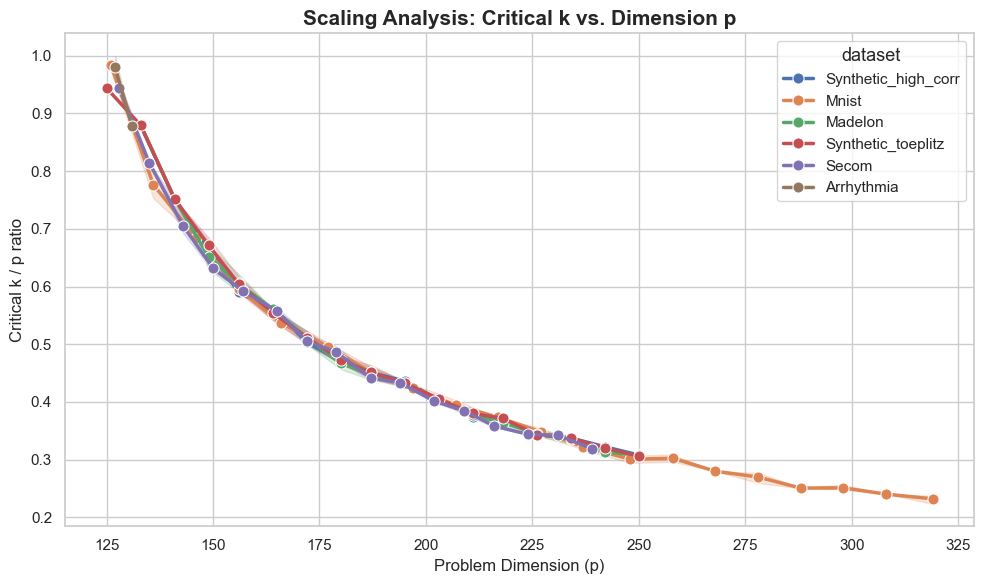

In [142]:
plot_p_ratio_time(df=df)

- Result implies taht as problem dimension increase, critical k / p ratio decreases.
- Critical k value is where we our algorihtm is faster than Greedy, maintaining an error threshold
- Implies for a big problem dimension, it's better?
- Useing n = 800, m = 100 set up

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit 

def plot_p_ratio_time_with_curve(df, p_limit=None):
    if p_limit:
        df = df[df["p"] < p_limit]
    
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # 1. Define the scaling law: y = a * x^(-1/3) + b
    def power_law(x, a, b):
        return a * (x ** (-1/3)) + b
    
    # 2. Fit this function
    df_clean = df.dropna(subset=['p', 'k_ratio'])
    popt, _ = curve_fit(power_law, df_clean['p'], df_clean['k_ratio'])
    
    # 3. Generate smooth x values for the line
    x_theory = np.linspace(df_clean['p'].min(), df_clean['p'].max(), 200)
    y_theory = power_law(x_theory, *popt)

    # 4. Create the Main Plot
    sns.lineplot(
        data=df, 
        x='p', 
        y='k_ratio', 
        hue='dataset', 
        marker='o', 
        linewidth=2.5, 
        markersize=8,
        alpha=0.6 
    )

    # 5. Plot the Theoretical Line
    plt.plot(
        x_theory, 
        y_theory, 
        color='black', 
        linestyle='--', 
        linewidth=2.5, 
        label=r'Theory: $y \propto p^{-1/3}$' # LaTeX 
    )

    # 6. Annotate 
    plt.title('Scaling Analysis: Critical k vs. Dimension p', fontsize=15, fontweight='bold')
    plt.xlabel('Problem Dimension (p)', fontsize=12)
    plt.ylabel('Critical k / p ratio', fontsize=12)
    
    plt.legend(title='Dataset', title_fontsize='13', fontsize='11')

    plt.tight_layout()

    # Save and Show
    plt.show()

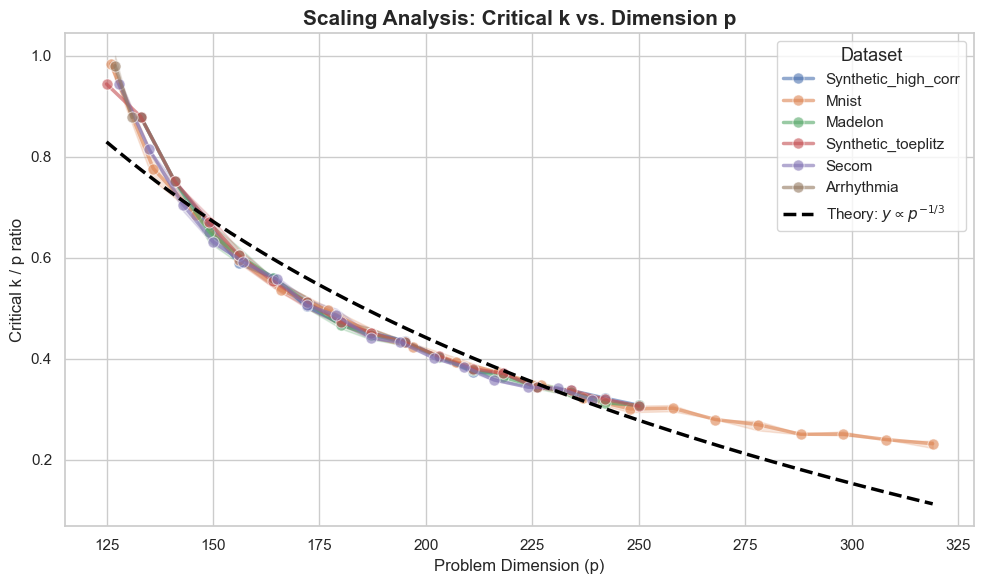

In [145]:
plot_p_ratio_time_with_curve(df)

In [20]:
df

,timestamp,dataset,p,final_critical_k,speedup_at_k,ratio,relative_error,k_ratio
14,2026-02-01 03:55:58,Synthetic_high_corr,133,117,1.0154,1.0000,0.00,0.879699
15,2026-02-01 03:55:59,Synthetic_high_corr,141,106,1.0325,1.0000,0.00,0.751773
16,2026-02-01 03:56:03,Synthetic_high_corr,149,102,1.0130,1.0000,0.00,0.684564
17,2026-02-01 03:56:08,Synthetic_high_corr,156,92,0.9540,0.9999,0.01,0.589744
18,2026-02-01 03:56:13,Synthetic_high_corr,164,92,0.9850,1.0000,0.00,0.560976
...,...,...,...,...,...,...,...,...
974,2026-02-01 12:18:22,Arrhythmia,131,115,0.9588,1.0006,-0.06,0.877863
1003,2026-02-01 12:20:05,Arrhythmia,127,124,0.9520,1.0001,-0.01,0.976378
1004,2026-02-01 12:20:07,Arrhythmia,131,115,0.9617,1.0018,-0.18,0.877863
1033,2026-02-01 12:26:16,Arrhythmia,127,127,0.9531,1.0000,0.00,1.000000


In [21]:
def print_summary_table(df):
    """
    Aggregates 5 runs per p value into a clean table showing:
    - Critical k (Mean)
    - Speedup (Mean [Min - Max])
    - Relative Error (Mean [Min - Max])
    """
    # 1. Ensure required columns exist
    if 'relative_error' not in df.columns and 'ratio' in df.columns:
        df['relative_error'] = (1 - df['ratio']) * 100
    
    # 2. Define Aggregation Logic
    # We group by Dataset and Dimension (p)
    # For k: just take the mean (rounded)
    # For Speedup & Error: take mean, min, and max
    agg_rules = {
        'final_critical_k': ['mean'],
        'speedup_at_k': ['mean', 'min', 'max'],
        'relative_error': ['mean', 'min', 'max']
    }

    # Perform GroupBy
    grouped = df.groupby(['dataset', 'p']).agg(agg_rules)
    
    # 3. Flatten and Format the Data
    # The groupby creates a "MultiIndex" (e.g., speedup_at_k -> mean, min, max). 
    # We want to combine these into single readable strings.
    
    results = []
    
    for (dataset, p), row in grouped.iterrows():
        # Format k: "45"
        k_val = int(row[('final_critical_k', 'mean')])
        
        # Format Speedup: "2.35x (2.10-2.50)"
        s_mean = row[('speedup_at_k', 'mean')]
        s_min = row[('speedup_at_k', 'min')]
        s_max = row[('speedup_at_k', 'max')]
        speedup_str = f"{s_mean:.2f}x ({s_min:.2f}-{s_max:.2f})"
        
        # Format Error: "0.12% (-0.50 - 0.80)"
        e_mean = row[('relative_error', 'mean')]
        e_min = row[('relative_error', 'min')]
        e_max = row[('relative_error', 'max')]
        error_str = f"{e_mean:.2f}% ({e_min:.2f}-{e_max:.2f})"
        
        results.append({
            'Dataset': dataset,
            'Dim (p)': p,
            'Critical k (Avg)': k_val,
            'Speedup (Mean [Min-Max])': speedup_str,
            'Rel. Error (Mean [Min-Max])': error_str
        })

    # Create final dataframe
    summary_df = pd.DataFrame(results)
    
    # 4. Print
    print("\n=== Aggregated Results (5 Runs per Test) ===")
    pd.set_option('display.max_colwidth', None) # Ensure full string prints
    print(summary_df.to_string(index=False))
    
    return summary_df
print_summary_table(df)


=== Aggregated Results (5 Runs per Test) ===
            Dataset  Dim (p)  Critical k (Avg) Speedup (Mean [Min-Max]) Rel. Error (Mean [Min-Max])
         Arrhythmia      127               124        0.96x (0.95-0.97)         -0.00% (-0.01-0.00)
         Arrhythmia      131               115        0.96x (0.95-0.97)        -0.10% (-0.18--0.06)
            Madelon      133               117        1.02x (1.00-1.03)          0.05% (-0.03-0.22)
            Madelon      141               106        1.02x (0.99-1.04)          0.05% (-0.03-0.09)
            Madelon      149                97        0.99x (0.96-1.04)           0.31% (0.18-0.49)
            Madelon      156                94        1.00x (0.98-1.04)           0.32% (0.26-0.48)
            Madelon      164                92        1.02x (0.99-1.04)           0.40% (0.25-0.62)
            Madelon      172                88        1.00x (0.96-1.04)           0.35% (0.27-0.54)
            Madelon      180                84        

,Dataset,Dim (p),Critical k (Avg),Speedup (Mean [Min-Max]),Rel. Error (Mean [Min-Max])
0,Arrhythmia,127,124,0.96x (0.95-0.97),-0.00% (-0.01-0.00)
1,Arrhythmia,131,115,0.96x (0.95-0.97),-0.10% (-0.18--0.06)
2,Madelon,133,117,1.02x (1.00-1.03),0.05% (-0.03-0.22)
3,Madelon,141,106,1.02x (0.99-1.04),0.05% (-0.03-0.09)
4,Madelon,149,97,0.99x (0.96-1.04),0.31% (0.18-0.49)
...,...,...,...,...,...
82,Synthetic_toeplitz,218,81,1.04x (1.03-1.05),0.78% (0.51-1.02)
83,Synthetic_toeplitz,226,77,0.99x (0.96-1.01),0.77% (0.56-1.06)
84,Synthetic_toeplitz,234,79,1.01x (0.98-1.04),0.77% (0.50-1.03)
85,Synthetic_toeplitz,242,77,1.01x (0.96-1.04),0.63% (0.49-0.78)


## Test 5 - 2
With normal setting ($m = 50$, adaptive step number)



In [119]:
LOG_FILE = PROJECT_ROOT / "logs" / "experiment5" / "critical_k_adaptive.csv"
PLOT_DIR = PROJECT_ROOT / "logs" / "plots"

print(f"Looking for log file at: {LOG_FILE}")

Looking for log file at: /Users/nautilus/gridfw/logs/experiment5/critical_k_adaptive.csv


In [120]:
df = load_data()
df = df[(df["speedup_at_k"] > 0.95) & (df["speedup_at_k"] < 1.05)]

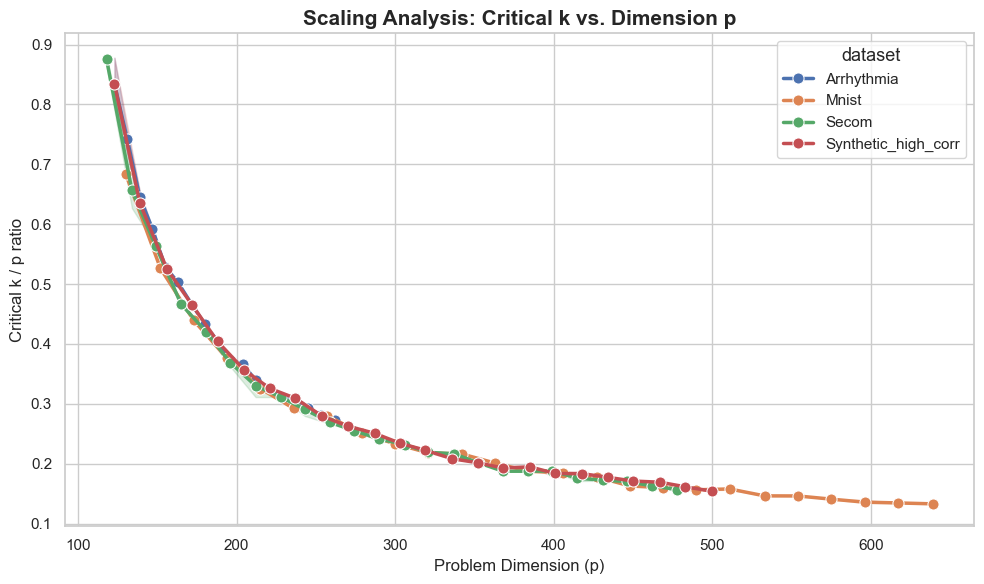

In [121]:
plot_p_ratio_time(df)

# Plot k - accuracy

In [113]:
LOG_FILE = PROJECT_ROOT / "logs" / "accur_crit_k.csv"
df = load_data()
df = df[(df["speedup_at_k"] > 0.95) & (df["speedup_at_k"] < 1.05)]

In [114]:
df

,timestamp,dataset,p,final_critical_k,speedup_at_k,ratio,relative_error,k_ratio
9,2026-02-01 12:52:39,Synthetic_high_corr,172,86,0.9621,0.9999,0.01,0.50000
39,2026-02-01 12:55:42,Synthetic_high_corr,172,86,0.9770,0.9999,0.01,0.50000
69,2026-02-01 12:58:44,Synthetic_high_corr,172,86,0.9681,0.9999,0.01,0.50000
99,2026-02-01 13:01:47,Synthetic_high_corr,172,86,0.9709,0.9999,0.01,0.50000
129,2026-02-01 13:04:49,Synthetic_high_corr,172,86,0.9710,1.0000,0.00,0.50000
157,2026-02-01 13:07:52,Mnist,173,87,0.9826,0.9963,0.37,0.50289
187,2026-02-01 13:15:01,Mnist,173,87,0.9941,0.9978,0.22,0.50289
217,2026-02-01 13:36:28,Mnist,173,87,0.9879,0.9994,0.06,0.50289
247,2026-02-01 13:43:38,Mnist,173,87,0.9901,0.9950,0.50,0.50289
277,2026-02-01 13:50:48,Mnist,173,87,0.9847,0.9963,0.37,0.50289


In [115]:

  
def plot_p_ratio_accur(df, p_limit=None):
    if p_limit:
        df = df[df["p"] < p_limit]
    # Also
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # 3. Create the Plot
    # Grouping by 'Dataset' happens automatically via the 'hue' parameter
    plot = sns.lineplot(
        data=df, 
        x='p', 
        y='k_ratio', 
        hue='dataset', 
        marker='o', 
        linewidth=2.5,
        markersize=8
    )

    # 4. Annotate and Beautify
    plt.title('Scaling Analysis: Critical k vs. Dimension p', fontsize=15, fontweight='bold')
    plt.xlabel('Problem Dimension (p)', fontsize=12)
    plt.ylabel('k_ratio', fontsize=12)
    plt.legend(title='dataset', title_fontsize='13', fontsize='11')

    # Optional: Force y-axis to start at 0
    # plt.ylim(0, df['Final_Critical_k'].max() * 1.1)


    plt.tight_layout()

    # 5. Save and Show
    # save_path = PROJECT_ROOT / "logs" / "plots" / "critical_k_time_p500.pdf"
    # save_path.parent.mkdir(parents=True, exist_ok=True)
    # plt.savefig(save_path, dpi=300)
    plt.show()



    

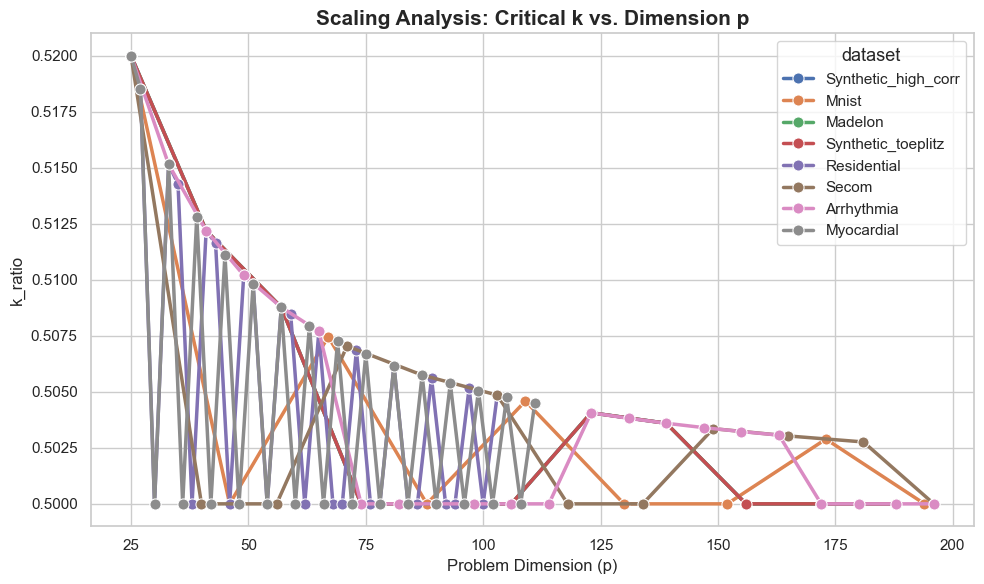

In [12]:
plot_p_ratio_accur(df, p_limit=200)

In [13]:
df = df[(df["Ratio"] > 0.95) & (df["Ratio"] < 1.05)]
df = df[df["p"] < 100]

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 3. Create the Plot
# Grouping by 'Dataset' happens automatically via the 'hue' parameter
plot = sns.lineplot(
    data=df, 
    x='p', 
    y='Final_Critical_k', 
    hue='Dataset', 
    marker='o', 
    linewidth=2.5,
    markersize=8
)

# 4. Annotate and Beautify
plt.title('Scaling Analysis: Critical k vs. Dimension p', fontsize=15, fontweight='bold')
plt.xlabel('Problem Dimension (p)', fontsize=12)
plt.ylabel('Critical k (Ratio ≈ 1.0)', fontsize=12)
plt.legend(title='Dataset', title_fontsize='13', fontsize='11')

# Optional: Force y-axis to start at 0
# plt.ylim(0, df['Final_Critical_k'].max() * 1.1)


plt.tight_layout()

# 5. Save and Show
save_path = PROJECT_ROOT / "logs" / "plots" / "critical_k_time.pdf"
save_path.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(save_path, dpi=300)
plt.show()

KeyError: 'Ratio'

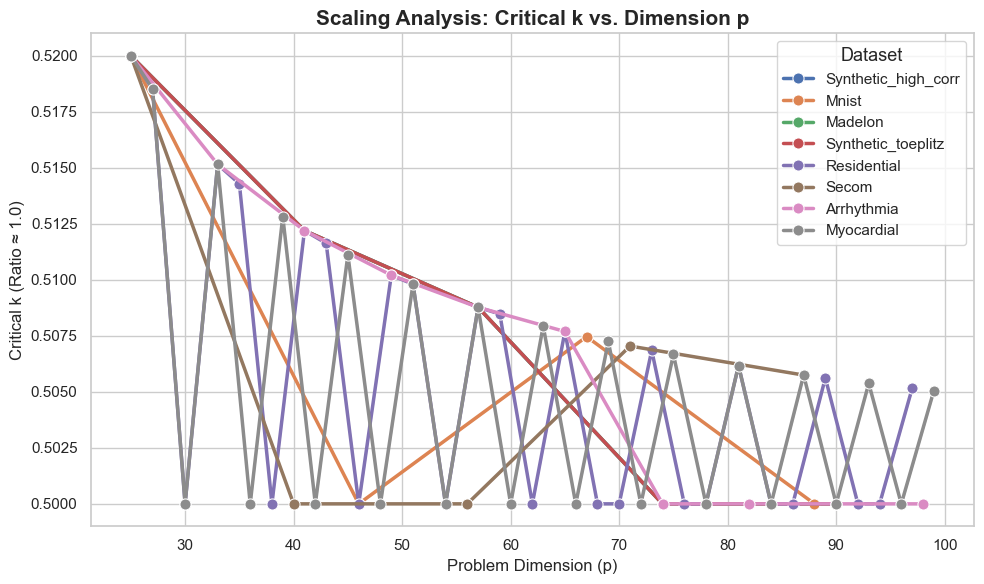

In [ ]:
df["kp_ratio"] = df["Final_Critical_k"] /  df["p"] 

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 3. Create the Plot
# Grouping by 'Dataset' happens automatically via the 'hue' parameter
plot = sns.lineplot(
    data=df, 
    x='p', 
    y='kp_ratio', 
    hue='Dataset', 
    marker='o', 
    linewidth=2.5,
    markersize=8
)

# 4. Annotate and Beautify
plt.title('Scaling Analysis: Critical k vs. Dimension p', fontsize=15, fontweight='bold')
plt.xlabel('Problem Dimension (p)', fontsize=12)
plt.ylabel('Critical k (Ratio ≈ 1.0)', fontsize=12)
plt.legend(title='Dataset', title_fontsize='13', fontsize='11')

# Optional: Force y-axis to start at 0
# plt.ylim(0, df['Final_Critical_k'].max() * 1.1)


plt.tight_layout()

# 5. Save and Show
save_path = PROJECT_ROOT / "logs" / "plots" / "critical_kp_ratio_accuracy.pdf"
save_path.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(save_path, dpi=300)
plt.show()

## Test 5 - 2
With normal setting ($m = 50$, adaptive step number)

LOG_FILE = PROJECT_ROOT / "logs" / "time_crit_k_adaptive.csv"
PLOT_DIR = PROJECT_ROOT / "logs" / "plots"

print(f"Looking for log file at: {LOG_FILE}")

In [ ]:

LOG_FILE = PROJECT_ROOT / "logs" / "time_crit_k_adaptive.csv"
PLOT_DIR = PROJECT_ROOT / "logs" / "plots"

print(f"Looking for log file at: {LOG_FILE}")

NameError: name 'PROJECT_ROOT' is not defined